In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas
import pickle
import seaborn as sns

In [11]:
with open("c_dfs.pickle", 'rb') as handle:
    c_dfs = pickle.load(handle)

In [14]:
c_dfs[days[0]]

,BusEq,Chems,Durbl,Enrgy,Hlth,Manuf,Money,NoDur,NumberOfFirms,Other,Shops,Telcm,Utils
0,4.0,5.0,0.0,2.0,2.0,2.0,4.0,0.0,27.0,3.0,4.0,1.0,0.0
1,3.0,0.0,1.0,0.0,1.0,2.0,6.0,1.0,22.0,2.0,2.0,1.0,3.0
2,1.0,2.0,1.0,0.0,0.0,2.0,5.0,1.0,19.0,3.0,1.0,1.0,2.0
3,5.0,3.0,1.0,0.0,1.0,1.0,2.0,0.0,18.0,2.0,3.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,11.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
57,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0
58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [12]:
days = list(c_dfs.keys())
days

['20180131', '20180201', '20180313']

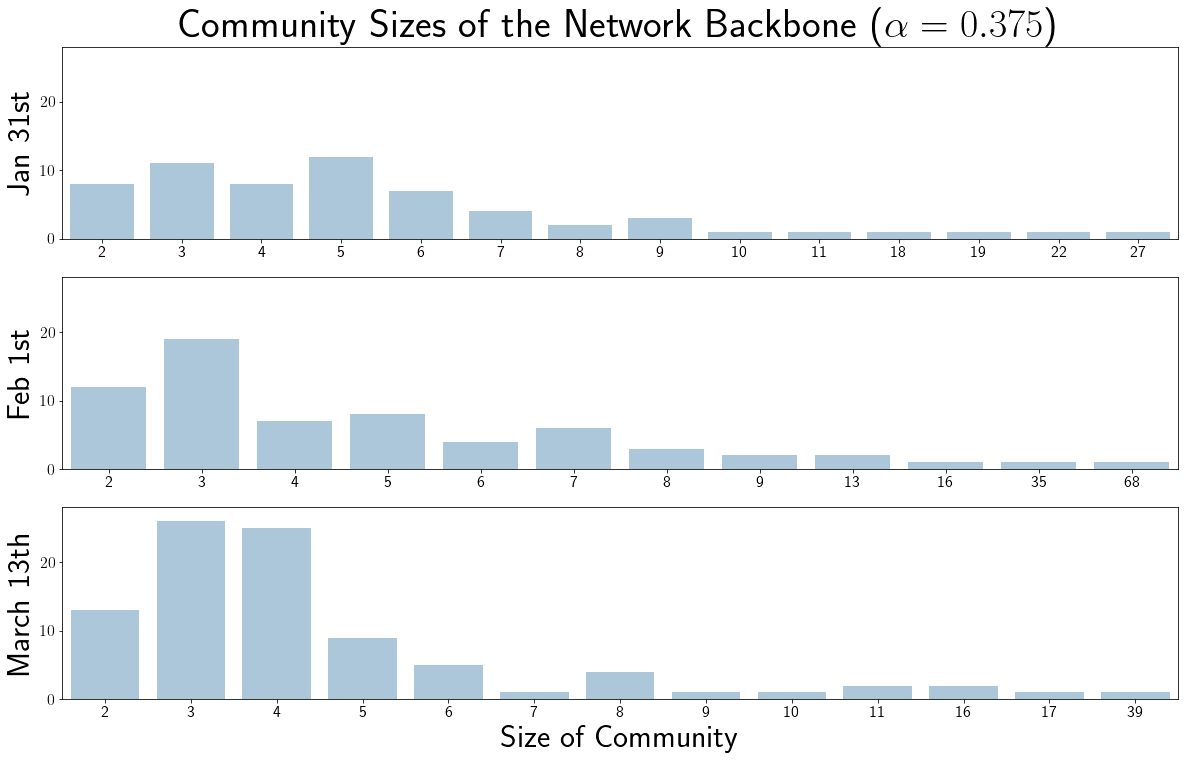

In [21]:
label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


alpha=0.375
f, axs = plt.subplots(len(days), 1, figsize=(20, 12))

label_dates  = {
    '20180131': "Jan 31st",
    '20180201': 'Feb 1st',
    '20180313': 'March 13th'
}
#for i, alpha in tqdm(enumerate(selected_alphas_)):
   
for j, day in enumerate(days):
    #axs[i][j].set_title("\alpha = {0}".format(alpha), fontsize=16)

    c_df = c_dfs[day].copy()
    c_df = c_df[c_df.NumberOfFirms >=2]
    Cnts = c_df.NumberOfFirms.value_counts()
    X = [int(x) for x in Cnts.index]
    sns.barplot(X, Cnts, ax=axs[j], color="#a5c8e1")#, kde=False)

    #if j == len(selected_alphas_)-1:
    #    axs[j].set_xlabel("Size of Community", fontsize=32)

    #axs[i].set_ylim(bottom=0, top=60)
    #if i ==0:
    #    axs[j].set_title(label_dates[day], fontsize=32)
    
    axs[j].set_ylabel("{0}".format(label_dates[day]), fontsize=32)


    #if j == 0: 
    #    axs[j].set_ylabel("Number Of Firms \n {0}".format(label_dates[day]), fontsize=32)
    #else:
    #    axs[j].set_ylabel("")
        
    axs[j].set_ylim([0,28])


axs[2].set_xlabel("Size of Community", fontsize=32)
axs[0].set_title(r'Community Sizes of the Network Backbone ($ \alpha = 0.375$)', fontsize=40)

plt.savefig("NetworkBackboneCommunitySizes")
plt.show()
plt.close()

In [19]:
mpl.__version__

'3.2.2'